# **SC2001 Project 1: Integration of Mergesort and Insertion Sort**

## **Part A: Algorithm Implementation**
To start, let's implement insertion sort first.

In [1]:
def insertsort(arr, l, r):
    cnt = 0  # Number of key comparisons
    for i in range(l + 1, r + 1):
        j = i
        while j > l:
            cnt += 1
            if arr[j] < arr[j - 1]:
                arr[j], arr[j - 1] = arr[j - 1], arr[j]
                j -= 1
            else:
                break
    return cnt

Then, we implement mergesort.

In [2]:
def merge(arr, l, r):
    # Sanity check
    if(r <= l): return 0
    mid = (l + r)//2
    szl = mid - l + 1  # Size of the left subarray
    szr = r - mid  # Size of the right subarray

    # Let's recreate the first 2 merged subarrays
    # We use pre-defined left and right arrays to save overhead
    left = [0] * szl
    right = [0] * szr
    for i in range(szl):
        left[i] = arr[l + i]
    for j in range(szr):
        right[j] = arr[mid + 1 + j]
    
    # Now, we set the iterators for left, right and arr respectively
    i = j = 0
    k = l

    # And also the comparison counter
    cnt = 0

    # And we start merging!
    while i < szl and j < szr:
        if left[i] <= right[j]:
            arr[k] = left[i]
            i += 1
        else:
            arr[k] = right[j]
            j += 1
        k += 1
        cnt += 1
        
    # Now for the leftovers
    while(i < szl):
        arr[k] = left[i]
        k += 1
        i += 1

    while(j < szr):
        arr[k] = right[j]
        k += 1
        j += 1
    
    return cnt

In [3]:
def hybridsort(arr, l, r, S):
    mid = (l + r)//2
    sz =  r - l + 1
    cnt = 0  # No of comparison counter
    if sz <= S:
        cnt += insertsort(arr, l, r)
    else:
        arr, left_cnt = hybridsort(arr, l, mid, S)
        cnt += left_cnt
        arr, right_cnt = hybridsort(arr, mid + 1, r, S)
        cnt += right_cnt
        cnt += merge(arr, l, r)
    
    return arr, cnt

Now, let's test the hybrid algorithm above, by randomly generating some test cases.

In [4]:
import sys
import copy
from tqdm.notebook import tqdm
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [5]:
def test(S, arr_sz):
    n = np.random.randint(0, arr_sz)
    tst = np.random.randint(1, sys.maxsize, size=n).tolist()
    tst_to_merge = copy.deepcopy(tst)
    tst.sort()
    return tst == hybridsort(tst_to_merge, 0, len(tst) - 1, S)[0]

def all_test(no_test_case = 100, arr_sz = 1000, S = 5):
    for _ in tqdm(range(no_test_case), desc="Running tests"):
        if test(S, arr_sz) == False:
            print("Wrong answer")
            return
    print("All test cases pass!")

In [6]:
all_test(1000, 10000, S = 1)

Running tests:   0%|          | 0/1000 [00:00<?, ?it/s]

All test cases pass!


Looks like our hybrid algorithm is working fine. We shall move on to the next part.

## **Part B: Generate Input Data**
To make sure that our analysis is robust, we set `x = sys.maxsize`, which is the highest value python can compute.

In [7]:
# Function to generate data between [1, ..., sys.maxsize] with length of n
def generate_data(n, x = sys.maxsize + 1):
    return np.random.randint(1, x, size=n).tolist()

## **Part C: Analyze Time Complexity**

First, we want to know the relationship between **no. of key comparison**, `cnt`, and **size of dataset**, `n`. We fix `S = 10` arbitrarily.

  0%|          | 0/5 [00:00<?, ?it/s]

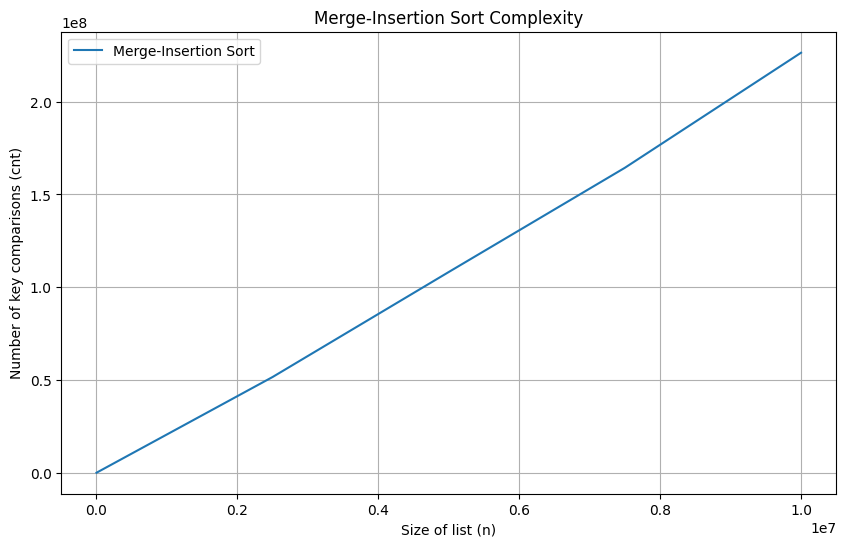

In [10]:
n_start = 1000
n_end = 10_000_000
m = 10  # No of values of n to plot, reduce this if you want it to run faster
S = 10  # Fix the number of S to 10 (arbitrary pick)

n_values = np.linspace(n_start, n_end, num=m, dtype=int)
cnt_values = []

progress_bar = tqdm(n_values)
for n in progress_bar:
    progress_bar.set_description(f"Running sort for array size {n}")
    data = generate_data(n)
    _, cnt = hybridsort(data, 0, len(data) - 1, S)
    cnt_values.append(cnt)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(n_values, cnt_values, linestyle='-', label='Merge-Insertion Sort')
ax.set_xlabel("Size of list (n)")
ax.set_ylabel("Number of key comparisons (cnt)")
ax.set_title("Merge-Insertion Sort Complexity")
ax.grid(True)
ax.legend()
plt.show()

Next, we want to know the relationship between **no. of key comparison**, `cnt`, and **value of** `S`. We fix `n = 10,000` arbitrarily.

  0%|          | 0/100 [00:00<?, ?it/s]

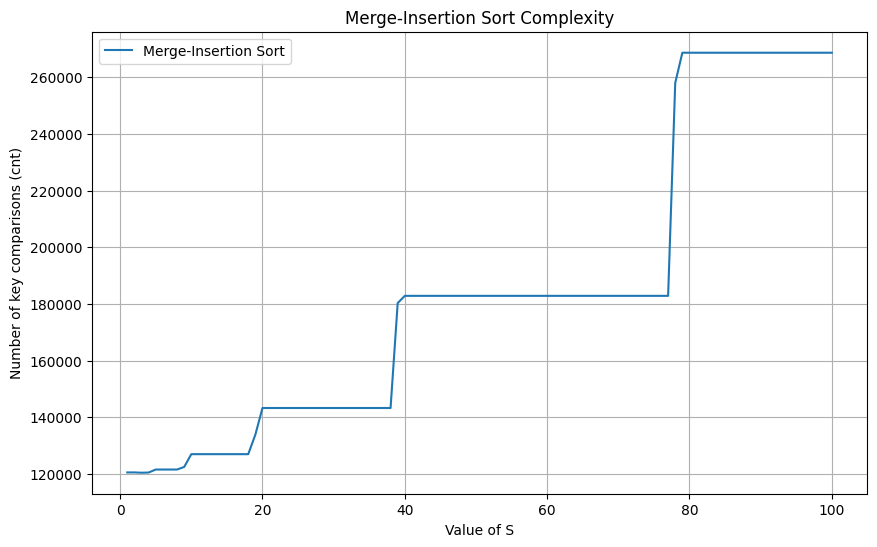

In [13]:
n = 10_000
S_start = 1
S_end = 100
m = 100

S_values = np.linspace(S_start, S_end, num=m, dtype=int)
data = generate_data(n)
cnt_values = []

progress_bar = tqdm(S_values)
for S in progress_bar:
    progress_bar.set_description(f"Running sort for S value of {S}")
    lst = copy.deepcopy(data)
    _, cnt = hybridsort(lst, 0, len(lst) - 1, S)
    cnt_values.append(cnt)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(S_values, cnt_values, linestyle='-', label='Merge-Insertion Sort')
ax.set_xlabel("Value of S")
ax.set_ylabel("Number of key comparisons (cnt)")
ax.set_title("Merge-Insertion Sort Complexity")
ax.grid(True)
ax.legend()
plt.show()

Finally, we want to determine what is the most optimal value of `S`. There are 2 ways to do this:
1. The **least** number of comparison, `cnt`
2. The **fastest** time taken to sort

We first try (1), where we find which value of `S` has the smallest number of comparison, `cnt`. From the plot above, we can constraint the search space to [1, 20]. We fix the size of dataset, `n = 1000` arbitrarily, but mostly to save up experimental time. Next, we do **5000 iterations** each with a different randomly generated dataset for a more robust result.

Running experiments:   0%|          | 0/5000 [00:00<?, ?it/s]

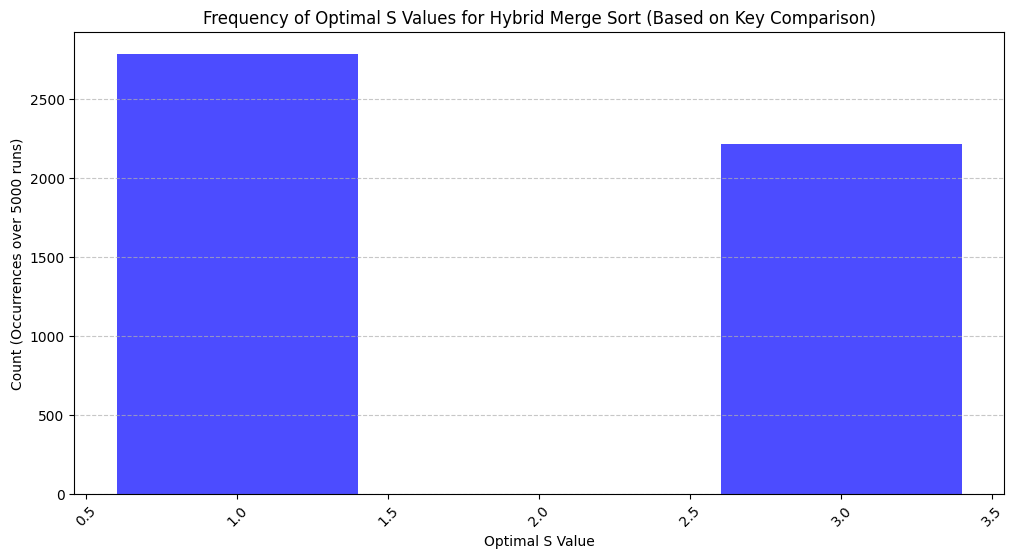

In [12]:
n = 1000
S_start = 1
S_end = 20
m = 20
iterations = 5000 

S_values = np.linspace(S_start, S_end, num=m, dtype=int)
optimS_counts = Counter() 

for _ in tqdm(range(iterations), desc="Running experiments"):
    data = generate_data(n) 
    cnt_values = []
    min_cnt = sys.maxsize
    optimS = -1

    for S in S_values:
        list_copy = copy.deepcopy(data)
        _, cnt = hybridsort(list_copy, 0, len(list_copy) - 1, S)
        cnt_values.append(cnt)

        if cnt < min_cnt:
            min_cnt = cnt
            optimS = S
    
    optimS_counts[optimS] += 1  

optimS_list = list(optimS_counts.keys())
count_list = list(optimS_counts.values())

plt.figure(figsize=(12, 6))
plt.bar(optimS_list, count_list, color='blue', alpha=0.7)
plt.xlabel("Optimal S Value")
plt.ylabel("Count (Occurrences over 5000 runs)")
plt.title("Frequency of Optimal S Values for Hybrid Merge Sort (Based on Key Comparison)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Hm, strange results. It seems like the optimal S value when we only care about minimising key comparison is either **1** or **3**. Why?

Well, my hypothesis (may be wrong, please check), is that $O(n^2)$ explodes very fast. At `S = 1` and `S = 3`, the number of key comparison between merge sort and insertion sort is the about the same (1 and 3 respectively, worst case). But afterwards, the $O(n^2)$ time complexity will always be greater than $O(nlog(n))$ time complexity of merge sort. So in terms of key comparison, in average - worst case, **merge sort always wins**. No matter the value of `S`.

Does this mean this hybrid sort is pointless? Let's check with (2), the execution time. We maintain the parameters `n`, `S_start`, `S_end`, `m` and `iterations`.

In [14]:
import time

Running experiments:   0%|          | 0/5000 [00:00<?, ?it/s]

Optimal value of S is: 14 with count of 933


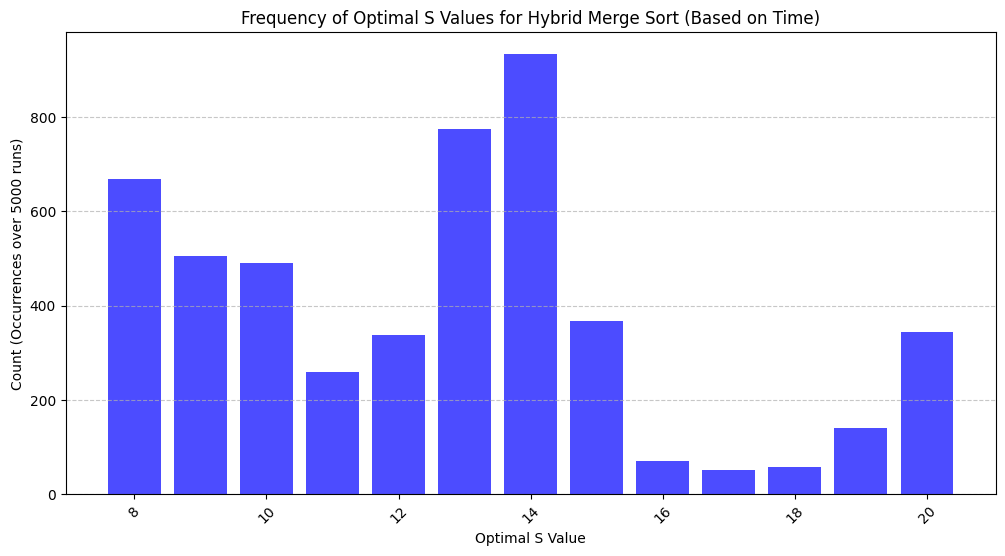

In [15]:
n = 1000
S_start = 1
S_end = 20
m = 20
iterations = 5000

S_values = np.linspace(S_start, S_end, num=m, dtype=int)
optimS_counts = Counter()

for _ in tqdm(range(iterations), desc="Running experiments"):
    data = generate_data(n)
    min_time = float("inf")
    optimS = -1

    for S in S_values:
        list_copy = copy.deepcopy(data)  
        start_time = time.time()
        hybridsort(list_copy, 0, len(list_copy) - 1, S)
        elapsed_time = time.time() - start_time

        if elapsed_time < min_time:
            min_time = elapsed_time
            optimS = S
    
    optimS_counts[optimS] += 1

optimS_list = list(optimS_counts.keys())
count_list = list(optimS_counts.values())

optimal_S_value = max(optimS_counts, key=optimS_counts.get)
optimal_S_count = optimS_counts[optimal_S_value]
print(f"Optimal value of S is: {optimal_S_value} with count of {optimal_S_count}")
 
plt.figure(figsize=(12, 6))
plt.bar(optimS_list, count_list, color='blue', alpha=0.7)
plt.xlabel("Optimal S Value")
plt.ylabel("Count (Occurrences over 5000 runs)")
plt.title("Frequency of Optimal S Values for Hybrid Merge Sort (Based on Time)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Aha! We find our optimal `S` when it comes down to who's fastest. `S = 14`! Let's compare this `S` value with normal merge sort now.

In [16]:
# Normal mergesort
def mergesort(arr, l, r):
    if r <= l:
        return arr, 0
    cnt = 0
    mid = (l + r) // 2
    _, cnt_left = mergesort(arr, l, mid)
    _, cnt_right = mergesort(arr, mid + 1, r)
    cnt += cnt_left + cnt_right
    cnt += merge(arr, l, r)
    return arr, cnt

Running experiments, again:   0%|          | 0/5000 [00:00<?, ?it/s]

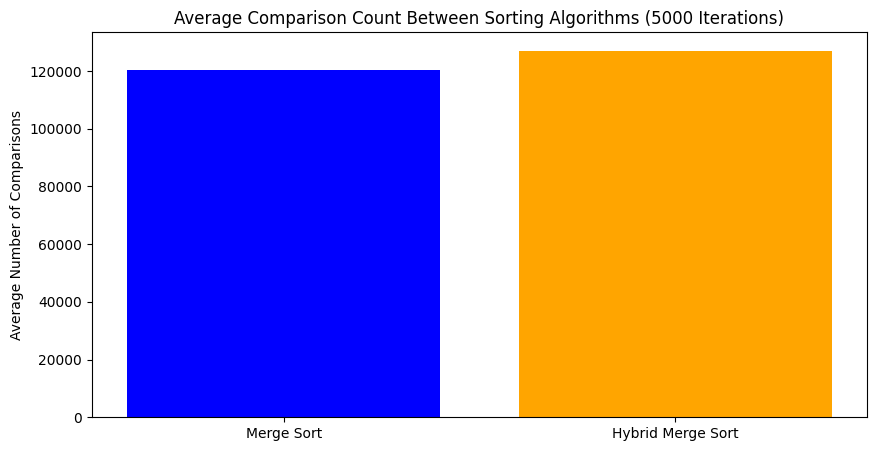

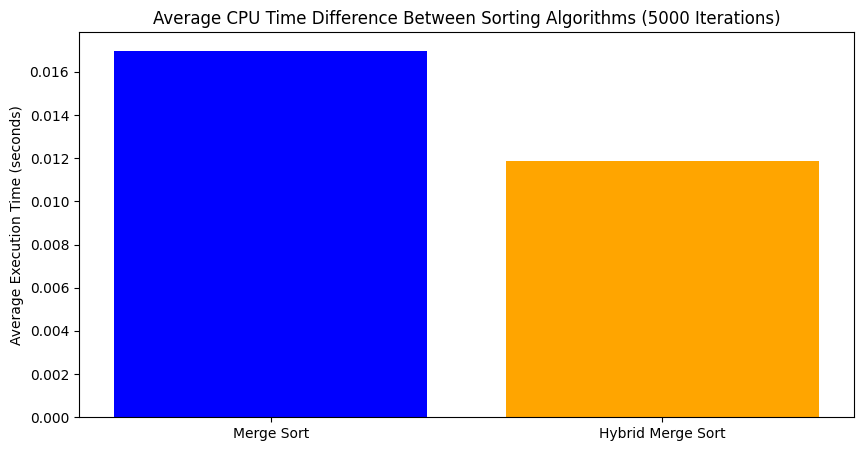

In [17]:
n = 10000
optimS = 14
iterations = 5000

total_time_mergesort = 0
total_time_hybridsort = 0
total_cnt_mergesort = 0
total_cnt_hybridsort = 0

for _ in tqdm(range(iterations), desc="Running experiments, again"):
    data = generate_data(n)

    arr_copy = data.copy()
    start_time = time.time()
    _, cnt_mergesort = mergesort(arr_copy, 0, len(arr_copy) - 1)
    total_time_mergesort += time.time() - start_time
    total_cnt_mergesort += cnt_mergesort

    arr_copy = data.copy()
    start_time = time.time()
    _, cnt_hybridsort = hybridsort(arr_copy, 0, len(arr_copy) - 1, optimS)
    total_time_hybridsort += time.time() - start_time
    total_cnt_hybridsort += cnt_hybridsort

avg_time_mergesort = total_time_mergesort / iterations
avg_time_hybridsort = total_time_hybridsort / iterations
avg_cnt_mergesort = total_cnt_mergesort / iterations
avg_cnt_hybridsort = total_cnt_hybridsort / iterations

# Plot Average Comparisons Count
plt.figure(figsize=(10, 5))
plt.bar(["Merge Sort", "Hybrid Merge Sort"], [avg_cnt_mergesort, avg_cnt_hybridsort], color=['blue', 'orange'])
plt.ylabel("Average Number of Comparisons")
plt.title("Average Comparison Count Between Sorting Algorithms (5000 Iterations)")
plt.show()

# Plot Average Execution Time
plt.figure(figsize=(10, 5))
plt.bar(["Merge Sort", "Hybrid Merge Sort"], [avg_time_mergesort, avg_time_hybridsort], color=['blue', 'orange'])
plt.ylabel("Average Execution Time (seconds)")
plt.title("Average CPU Time Difference Between Sorting Algorithms (5000 Iterations)")
plt.show()

As expected, while the hybrid sort has more key comparisons than merge sort, its execution time is way faster. As such, we have these takeaways:
1. Key comparison is a bad metric to determine efficiency of an algorithm.
   - This is because there are many other factors to consider: cost of different operation, memory access, cache, etc etc
2. Empirical study (i.e. execution time) is a better overall metric.
   - From our study, we find that `S = 14` is the best
3. Hybrid algorithm is better than naive merge sort.